In [1]:
import warnings ;warnings.filterwarnings('ignore')
import sys ;sys.path.append("../../../")
from  CommonFunc import *

◎ 현재 경로의 폴더 목록 --
  1. /Users/forrestdpark/Desktop/PDG/Python_/BerryMLcompetetion/공모전/서울GovTech/돌봄서비스/데이터파일
  2. /Users/forrestdpark/Desktop/PDG/Python_/BerryMLcompetetion/공모전/서울GovTech/돌봄서비스/사진
  4. /Users/forrestdpark/Desktop/PDG/Python_/BerryMLcompetetion/공모전/서울GovTech/돌봄서비스/__pycache__
  9. /Users/forrestdpark/Desktop/PDG/Python_/BerryMLcompetetion/공모전/서울GovTech/돌봄서비스/jihwan_예측율_test
◎ 주피터 가상환경 체크 : base
◎ Python 설치 경로:/opt/anaconda3/bin/python
◎ Graph 한글화 Setting
◎ OS platform 한글 세팅완료
✻✻✻✻______🙄 20-21 번 파일 데이터 보고 분석 by Forrest.D.Park 🙄______✻✻✻✻


Data File 불러오는 중..:  1%|          | 1/100 [elapsed: 00:00 remaining: 01:17]



20.여성가족부_아이돌봄서비스 현장모니터링결과_지표문항별응답_3점척도_20240331.xlsx 파일의 데이터 프레임.tail() 


,기준년월,센터명,서비스종류,서비스유형,응답일자,상위센터명,문항번호,3점척도_전체응답_가구수,3점척도_4점_가구수,3점척도_3점_가구수,3점척도_2점_가구수,3점척도_1점_가구수,3점척도_0점_가구수,최초등록일시
13135,2024-03-01,부산 서구 가족센터,시간제,시간제-다형,2020-01-01,부산광역시아이돌봄광역지원센터,RE2000_2_YN,2,0,0,2,0,0,2024-04-05 00:10:00
13136,2024-03-01,부산 서구 가족센터,시간제,시간제-다형,2020-01-01,부산광역시아이돌봄광역지원센터,RE2000_3_YN,2,0,0,2,0,0,2024-04-05 00:10:00
13137,2024-03-01,부산 서구 가족센터,시간제,시간제-다형,2020-01-01,부산광역시아이돌봄광역지원센터,RE2000_4_YN,2,0,0,2,0,0,2024-04-05 00:10:00
13138,2024-03-01,부산 서구 가족센터,시간제,시간제-다형,2020-01-01,부산광역시아이돌봄광역지원센터,RF2100,2,0,2,0,0,0,2024-04-05 00:10:00
13139,2024-03-01,부산 서구 가족센터,시간제,시간제-다형,2020-01-01,부산광역시아이돌봄광역지원센터,RF2200,2,0,2,0,0,0,2024-04-05 00:10:00


 ◎ Column  : 14 개 

   기준년월,    센터명,    서비스종류,    서비스유형,    응답일자, 
   상위센터명,    문항번호,    3점척도_전체응답_가구수,    3점척도_4점_가구수,    3점척도_3점_가구수, 
   3점척도_2점_가구수,    3점척도_1점_가구수,    3점척도_0점_가구수,    최초등록일시, 
 ◎ Row size    : 13140 개
 ◎ Null count   : 0 개
 ◎ 칼럼별 데이터 중복체크
   □ 1번째 칼럼 " 기준년월"  타입 datetime64[ns]) 
    1 	/13140 	[uniq/raw]


,"""기준년월"" 칼럼의 중복값",개수분포
1,2024-03-01,13140


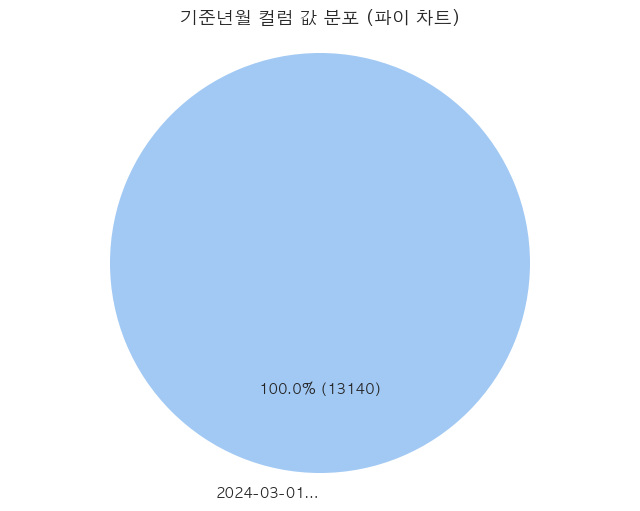

숫자형데이터가 아닙니다
   □ 2번째 칼럼 " 센터명"  타입 object) 
    153 	/13140 	[uniq/raw]


,"""센터명"" 칼럼의 중복값",개수분포
1,광주북구건강가정지원센터,180
2,광주 서구 가족센터,180
3,울산 남구아이돌봄지원센터,150
4,경남 진주시 건강가정지원센터,150
5,전북 전주시 건강가정지원센터,150
6,광주동구아이돌봄지원센터,150
7,서울 양천구 건강가정지원센터,150
8,대전 서구가족센터,150
9,부산 금정구 가족센터,150
10,부산 기장군 건강가정지원센터,150


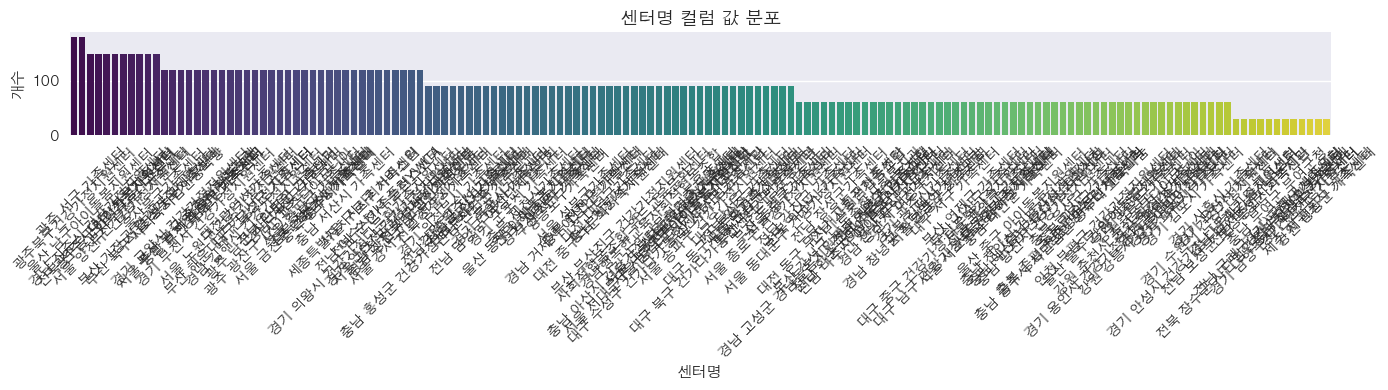

숫자형데이터가 아닙니다
   □ 3번째 칼럼 " 서비스종류"  타입 object) 
    2 	/13140 	[uniq/raw]


,"""서비스종류"" 칼럼의 중복값",개수분포
1,시간제,11730
2,종일제,1410


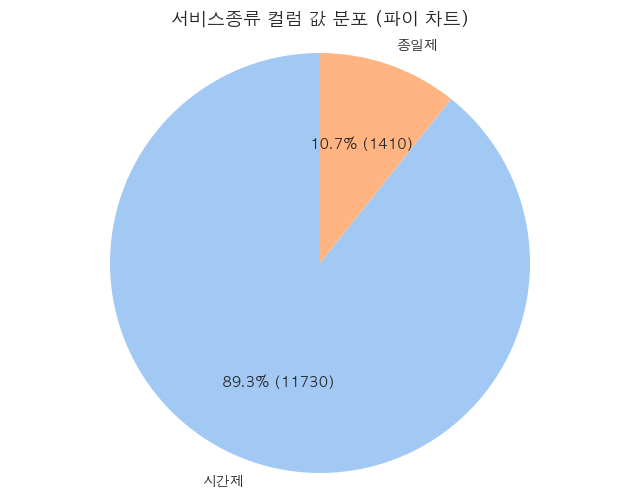

숫자형데이터가 아닙니다
   □ 4번째 칼럼 " 서비스유형"  타입 object) 
    8 	/13140 	[uniq/raw]


,"""서비스유형"" 칼럼의 중복값",개수분포
1,시간제-가형,4410
2,시간제-나형,3900
3,시간제-라형,2070
4,시간제-다형,1320
5,종일제-가형,900
6,종일제-나형,330
7,종일제-라형,180
8,종일제-다형,30


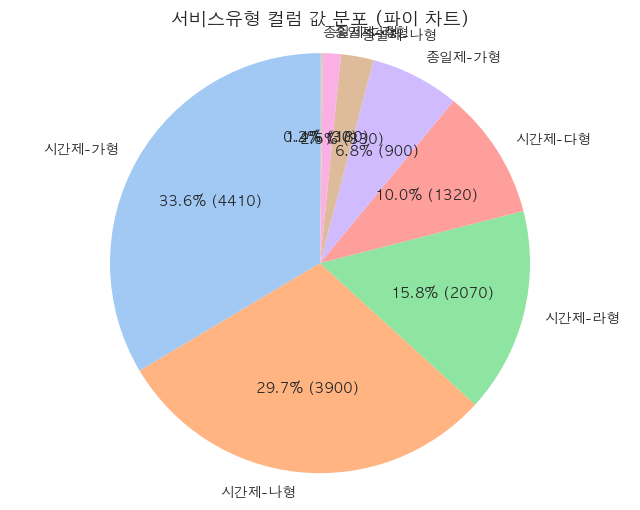

숫자형데이터가 아닙니다
   □ 5번째 칼럼 " 응답일자"  타입 datetime64[ns]) 
    1 	/13140 	[uniq/raw]


,"""응답일자"" 칼럼의 중복값",개수분포
1,2020-01-01,13140


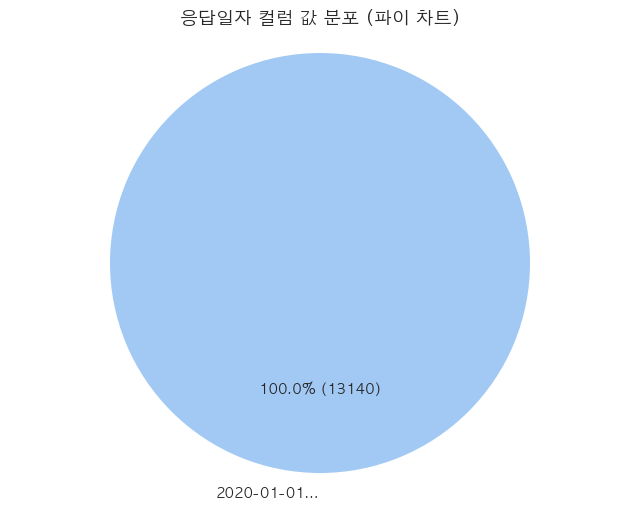

숫자형데이터가 아닙니다
   □ 6번째 칼럼 " 상위센터명"  타입 object) 
    16 	/13140 	[uniq/raw]


,"""상위센터명"" 칼럼의 중복값",개수분포
1,서울특별시 광역거점,2310
2,경기도 광역거점,1710
3,부산광역시아이돌봄광역지원센터,1440
4,전라남도 광역거점,1410
5,경상남도가족센터,1170
6,충청남도 광역거점,810
7,광주광역시 광역거점,750
8,대구광역시 광역거점,660
9,전라북도 광역거점,660
10,충청북도 광역거점,600


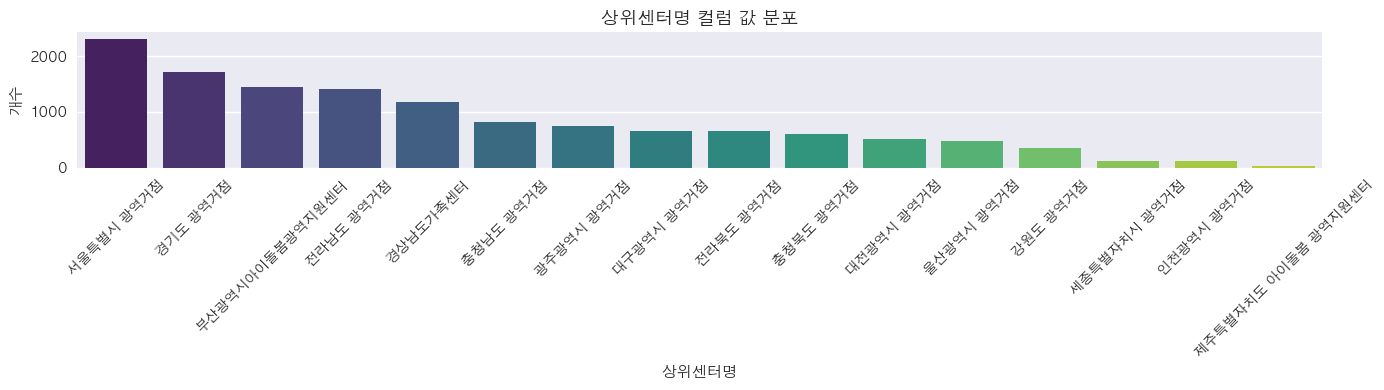

숫자형데이터가 아닙니다
   □ 7번째 칼럼 " 문항번호"  타입 object) 
    30 	/13140 	[uniq/raw]


,"""문항번호"" 칼럼의 중복값",개수분포
1,RA0100,438
2,RA0200,438
3,RF2100,438
4,RE2000_4_YN,438
5,RE2000_3_YN,438
6,RE2000_2_YN,438
7,RE2000_1_YN,438
8,RE2000,438
9,RE1900,438
10,RE1800_4_YN,438


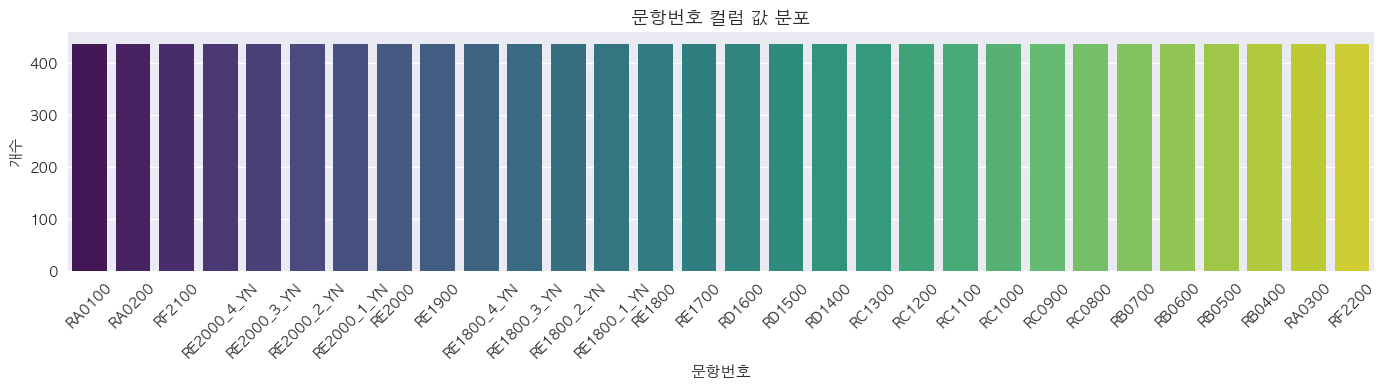

숫자형데이터가 아닙니다
   □ 8번째 칼럼 " 3점척도_전체응답_가구수"  타입 int64) 
    23 	/13140 	[uniq/raw]


,"""3점척도_전체응답_가구수"" 칼럼의 중복값",개수분포
1,1,4410
2,2,2250
3,3,2160
4,4,1230
5,5,660
6,7,540
7,6,360
8,8,330
9,9,270
10,11,240


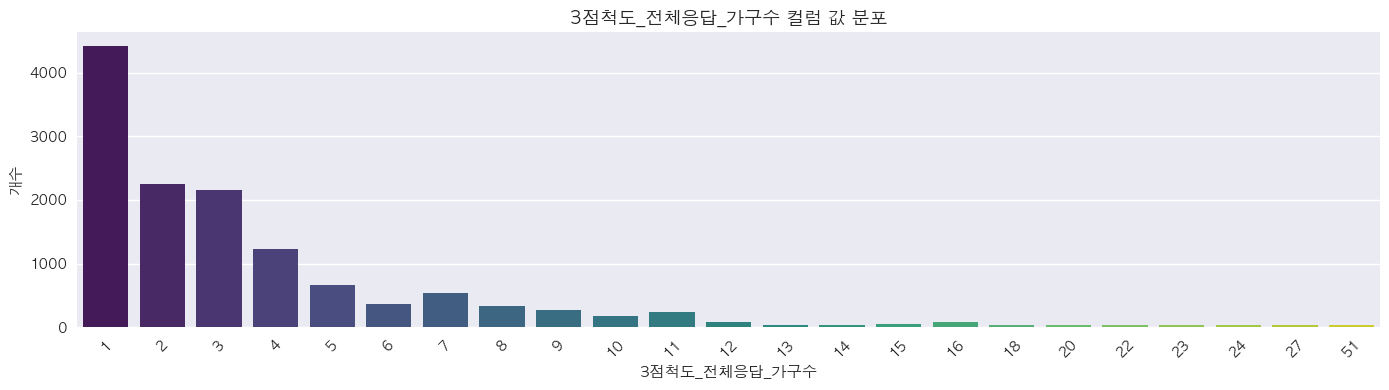

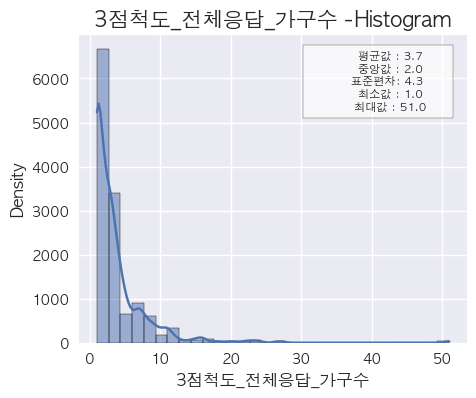

   □ 9번째 칼럼 " 3점척도_4점_가구수"  타입 int64) 
    1 	/13140 	[uniq/raw]


,"""3점척도_4점_가구수"" 칼럼의 중복값",개수분포
1,0,13140


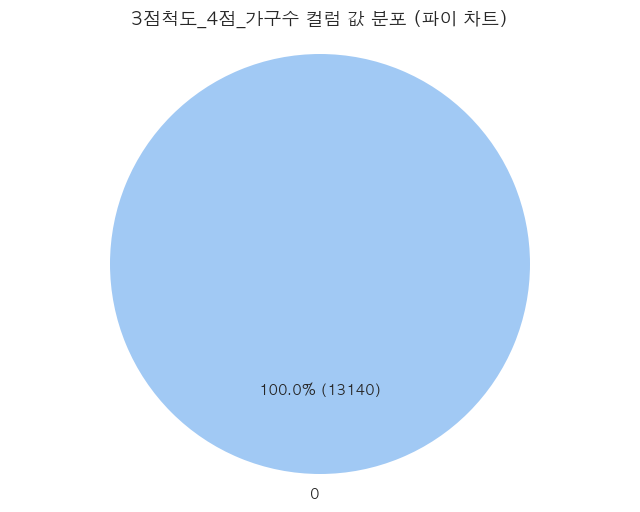

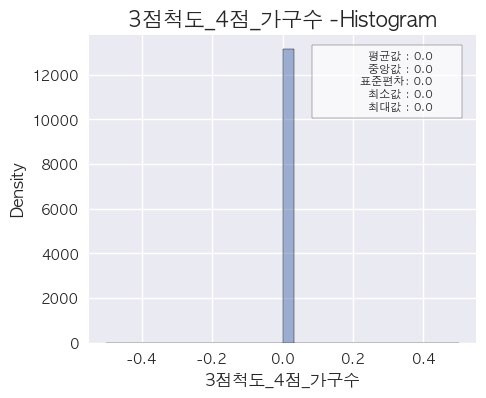

   □ 10번째 칼럼 " 3점척도_3점_가구수"  타입 int64) 
    27 	/13140 	[uniq/raw]


,"""3점척도_3점_가구수"" 칼럼의 중복값",개수분포
1,0,4687
2,1,2976
3,2,1451
4,3,1368
5,4,762
6,5,415
7,7,331
8,6,228
9,8,201
10,9,163


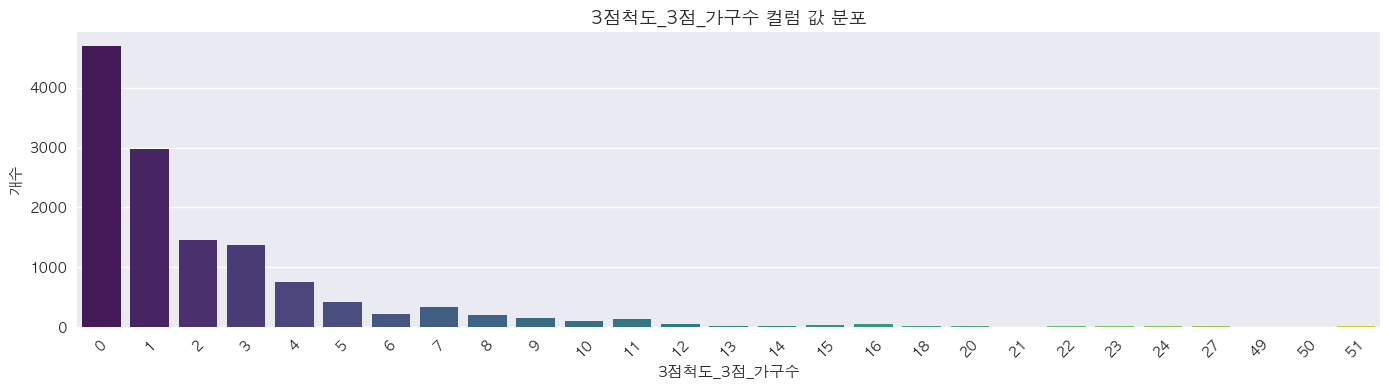

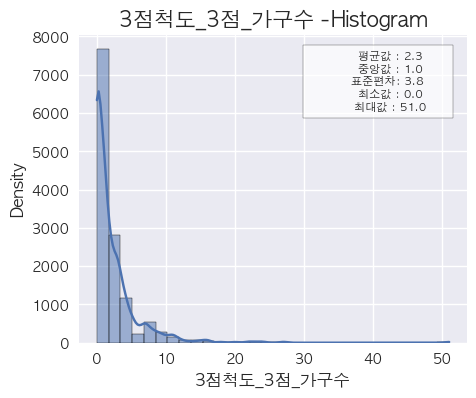

   □ 11번째 칼럼 " 3점척도_2점_가구수"  타입 int64) 
    27 	/13140 	[uniq/raw]


,"""3점척도_2점_가구수"" 칼럼의 중복값",개수분포
1,0,10323
2,1,1080
3,2,497
4,3,440
5,4,246
6,5,119
7,7,86
8,8,66
9,6,57
10,9,56


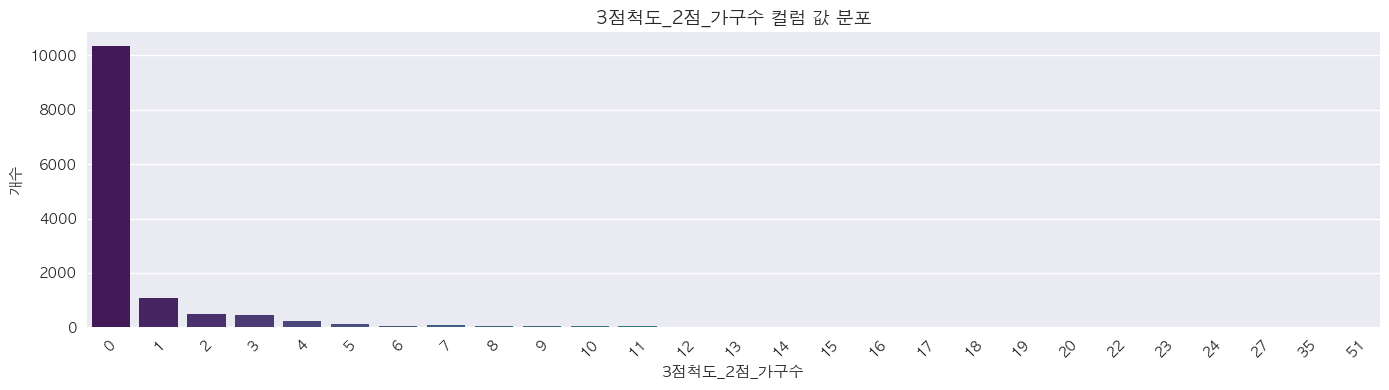

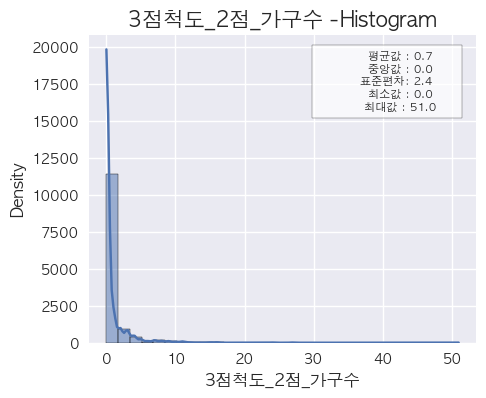

   □ 12번째 칼럼 " 3점척도_1점_가구수"  타입 int64) 
    27 	/13140 	[uniq/raw]


,"""3점척도_1점_가구수"" 칼럼의 중복값",개수분포
1,0,11500
2,1,650
3,2,304
4,3,230
5,4,122
6,5,75
7,7,58
8,6,47
9,8,42
10,9,20


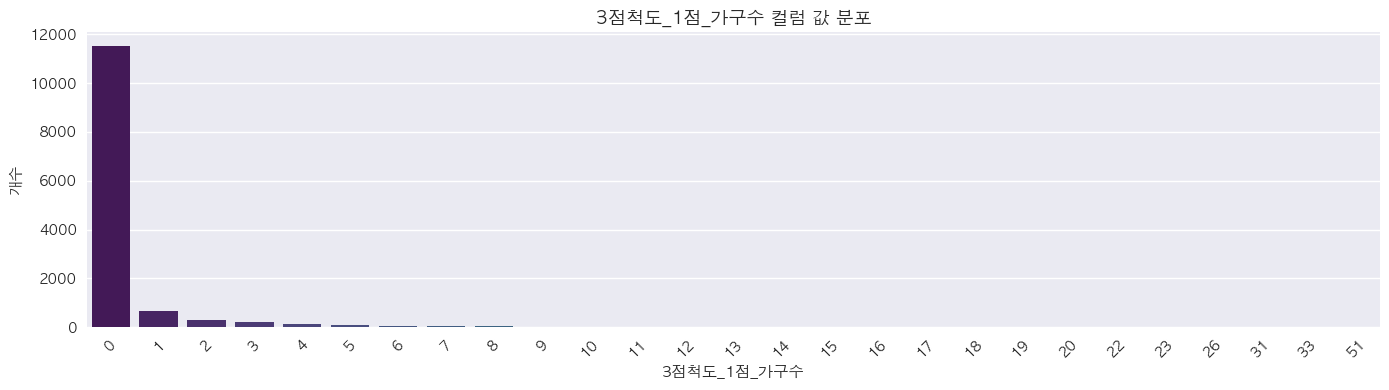

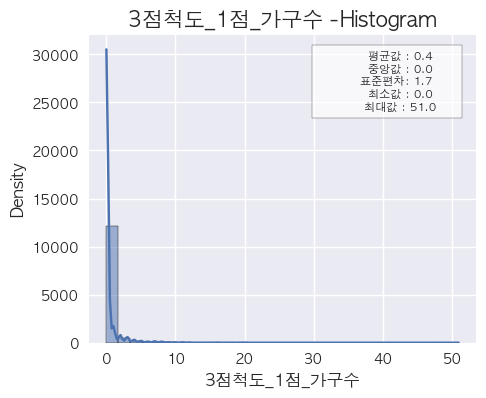

   □ 13번째 칼럼 " 3점척도_0점_가구수"  타입 int64) 
    27 	/13140 	[uniq/raw]


,"""3점척도_0점_가구수"" 칼럼의 중복값",개수분포
1,0,12090
2,1,386
3,2,209
4,3,153
5,4,91
6,5,48
7,7,34
8,6,29
9,9,21
10,8,20


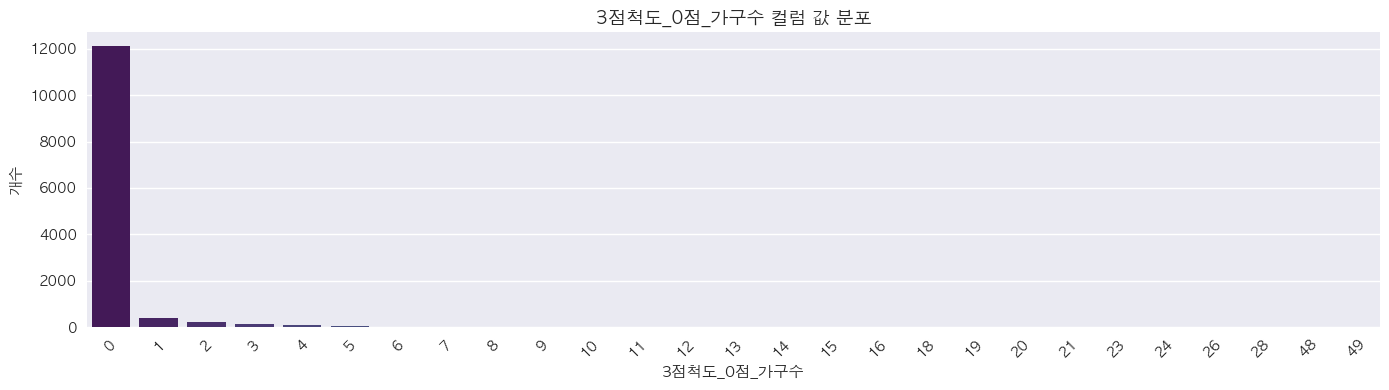

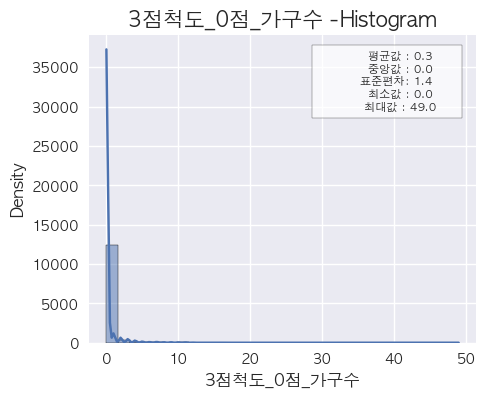

   □ 14번째 칼럼 " 최초등록일시"  타입 datetime64[ns]) 
    1 	/13140 	[uniq/raw]


,"""최초등록일시"" 칼럼의 중복값",개수분포
1,2024-04-05 00:10:00,13140


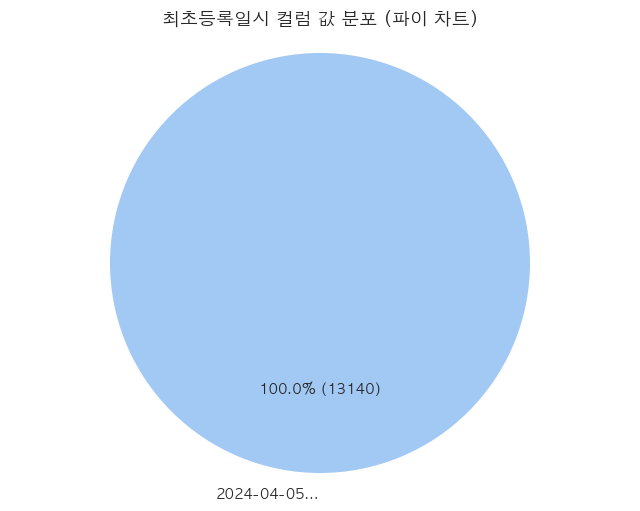

숫자형데이터가 아닙니다
	[RESULT] 🙀🙀🙀🙀🙀🙀🙀🙀🙀🙀🙀🙀🙀🙀🙀🙀🙀🙀🙀🙀🙀🙀🙀🙀🙀🙀🙀🙀🙀🙀
	🟦10개이하의 값 종류를 가지는 칼럼 
		- 기준년월:1: [Timestamp('2024-03-01 00:00:00')]
		- 센터명:153: ['강원 평창군 가족센터', '충북 제천시가족센터', '충북 진천군 가족센터', '충북 괴산군 가족센터', '충북 음성군 가족센터', '충북 증평군 증평여성단체협의회', '충북 청주시 가족센터', '충북 충주시가족센터', '충남 공주시 사단법인 공주대 교육나눔', '충남 계룡시가족센터', '충남 논산시 논산시청', '충남 당진시 건강가정지원센터', '충남 부여군 부여군청', '충남 서산시 가족센터', '충남 아산시 건강가정·다문화가족지원센터', '세종특별자치시사회서비스원', '충남 예산군 건강가정지원센터', '충남 천안시 건강가정지원센터', '충남 청양군 가족센터', '충남 태안군 가족센터', '서울 강남구 가족센터', '서울 강동구 가족센터', '서울 강북구 가족센터', '서울 강서구 건강가정지원센터', '서울 관악구 가족센터', '서울 광진구 건강가정지원센터', '서울 구로구 가족센터', '서울 금천구 건강가정지원센터', '서울 노원구 건강가정지원센터', '서울 도봉구 건강가정지원센터', '서울 동작구 아이돌봄지원사업', '서울 마포구 가족센터', '서울 서초구 건강가정지원센터', '서울 성동구가족센터', '서울 성북구가족센터', '서울 송파구 건강가정지원센터', '서울 양천구 건강가정지원센터', '서울 은평구 가족센터', '서울 종로구 건강가정지원센터', '서울 중구 가족센터', '서울 중랑구 비전공유 협동조합', '부산 금정구 가족센터', '부산 남구 종합사회복지관', '부산 동래구가족센터', '부산 북구 사회복지법인공덕향', '부산 사상구 가족센터', '부산 사하구 가족센터', '부산 수영구 가족센터', '부산 연제구 가족센터', '부산 영도구 가족센터', '부산 해운대구 건강가정지원센터', '영등포구가족센터'

In [19]:

def data_watch(start_):
    
    DataPreprocessing.plotSetting()
    ## Data Fetching
    data_folder_path="./데이터파일"
    start_data  =start_
    end_data =start_data+1
    Analysis_title(f"{start_data}-{end_data} 번 파일 데이터 보고 분석 by Forrest.D.Park")
    data_dict=DataPreprocessing.data_fetch(data_folder_path,start_data,end_data)
    for i in range(len(data_dict.keys())):
        data_num= sorted(data_dict.keys())[i]
        print(yellow(f"\n\n{data_num} 파일의 데이터 프레임.tail() "))
        # 화면 가운데 정렬하여 출력
        df_display_centered(DataPreprocessing.key_selector(data_dict, i).tail())
        DataPreprocessing.dataInfo2(DataPreprocessing.key_selector(data_dict,i))
    return data_dict

data_dict=data_watch(20)

--- 
### 수치형 데이터일 경우 Gropu by 하고 싶을 때 돌리는 함수 제작 

,3점척도_전체응답_가구수,3점척도_4점_가구수,3점척도_3점_가구수,3점척도_2점_가구수,3점척도_1점_가구수,3점척도_0점_가구수
0,48840.0,0.0,30403.0,9561.0,5387.0,3489.0


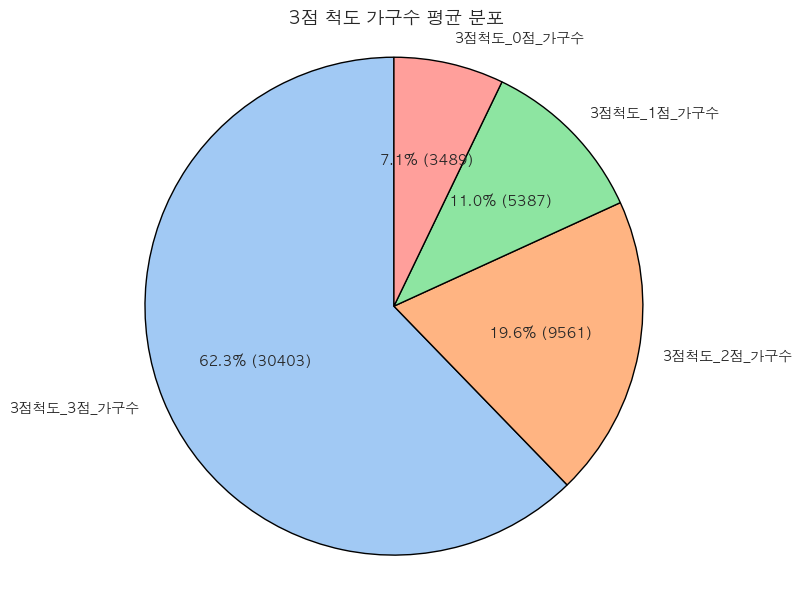

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
test = DataPreprocessing.key_selector(data_dict, 0)
# df_display_centered(test.tail(3))

if pd.api.types.is_datetime64_any_dtype(test['기준년월']):
        print(f"'기준년월'' 칼럼은 timestamp 타입입니다.")
        test['기준년월'] = pd.to_datetime(test['기준년월'])
        print(yellow(" 기준 년월 칼럼을 integer 로 변환"))
        # '기준년월' 칼럼을 integer 타입으로 변환 (연월 형식으로)
        test['기준년월'] = test['기준년월'].dt.year * 100 + test['기준년월'].dt.month

기준연월 = test['기준년월'].unique()
## 시간대별 데이터를 보는 함수 
def plot_by_timeline(df, time_col_word='시간',group_by_col =['기준년월'], delete_column = '데이터기준일자'):
    if delete_column in df.columns:
        
        df.drop(columns=delete_column, inplace=True)
    numeric_columns=test.select_dtypes(include=['number'])
    # time_columns = [col for col in df.columns if time_col_word in col] ## 들어간 단어로 구분하고싶을때
    # print(time_columns)
    # 시간대별 데이터 그룹화
    # print(type(numeric_columns))
    grouped_df_sum = numeric_columns.groupby(group_by_col).sum().reset_index()  
    grouped_df_mean = numeric_columns.groupby(group_by_col).mean().reset_index()  


    return grouped_df_mean,grouped_df_sum  # grouped_df_mean 반환
def pie_plot(df,plot_title=""):
    import matplotlib.pyplot as plt
    import seaborn as sns, pandas as pd
    plt.figure(figsize=(8, 6))  # 그래프 크기 설정
    # 시간대별 시작 건수 합계 계산

    # # 상위 8개 이외의 값을 "기타"로 합치기
    # top_8_index = time_table.nlargest(7).index
    # other_sum = time_table[~time_table.index.isin(top_8_index)].sum()
    # time_table = pd.concat([time_table[top_8_index], pd.Series({'기타': other_sum})])  # concat 사용

    # 레이블 설정 및 자르기
    # time_table = df.values.flatten()  # 1차원 배열로 변환
    labels = df.columns.tolist()
    # for i, label in enumerate(labels):
    #     if len(str(label)) > 6:
    #         labels[i] = label[2:7] + ""

    # 색상 팔레트 설정
    colors = sns.color_palette("pastel", len(df.columns))

    # 퍼센트와 실제 수치 함께 표시하는 함수
    def make_autopct(values):
        def my_autopct(pct):
            total = sum(values)
            val = int(round(pct * total / 100.0))
            return f'{pct:.1f}% ({val:d})'
        return my_autopct

    # 파이 차트 그리기
    # plt.pie(time_sums.values, labels=labels, autopct=make_autopct(time_sums.values), startangle=90, colors=colors)
    
    plt.pie(df.values[0], labels=labels, autopct=make_autopct(df.values[0]), startangle=90, colors=colors, 
            wedgeprops={"linewidth": 1, "edgecolor": "black"}, 
           )
    plt.title(f" {plot_title}", fontsize=13)
    plt.axis('equal')  # 파이 차트를 원형으로 유지
    plt.tight_layout()
    plt.show()  # 그래프 출력
# pie_plot(df)
# df = test[test['기준연월'] == 기준연월[0]]
df_mean, df_sum = plot_by_timeline(test, time_col_word='시간',group_by_col =['기준년월'])
# df_display_centered(df_mean)
# pie_plot(df_mean.iloc[0:1,1:])
total_mean= df_sum.sum()/len(df_sum.index)
df_total_mean=pd.DataFrame(total_mean).T
df_total_mean.drop(columns="기준년월",inplace=True)
# df_total_mean.drop(columns=["연계건수","신청건수"],inplace=True)
df_display_centered(df_total_mean)
wanted_columns =['시간제아동수','종일제아동수']
pie_plot(df_total_mean.iloc[:,2:],"3점 척도 가구수 평균 분포")
# pie_plot(df_total_mean[wanted_columns],"아동수 평균 분포")


In [23]:
DataPreprocessing.key_selector(data_dict,0)["기준년월"].unique()

array([202403], dtype=int32)

In [13]:
test = DataPreprocessing.key_selector(data_dict,0)
# '기준년월' 칼럼을 datetime 타입으로 변환
test['기준년월'] = pd.to_datetime(test['기준년월'])

# '기준년월' 칼럼을 integer 타입으로 변환 (연월 형식으로)
test['기준년월'] = test['기준년월'].dt.year * 100 + test['기준년월'].dt.month

# 결과 출력
print(test)

        기준년월                            센터명 서비스종류   서비스유형       응답일자  \
0     202403                    충북 옥천군 가족센터   시간제  시간제-가형 2020-01-01   
1     202403                    충북 옥천군 가족센터   시간제  시간제-나형 2020-01-01   
2     202403                    충북 옥천군 가족센터   시간제  시간제-다형 2020-01-01   
3     202403                    충북 옥천군 가족센터   시간제  시간제-라형 2020-01-01   
4     202403                    충북 옥천군 가족센터   종일제  종일제-가형 2020-01-01   
...      ...                            ...   ...     ...        ...   
1819  202403  경기 시흥시 사회적협동조합 경기시흥작은자리지역자활센터   시간제  시간제-라형 2020-01-01   
1820  202403  경기 시흥시 사회적협동조합 경기시흥작은자리지역자활센터   종일제  종일제-가형 2020-01-01   
1821  202403  경기 시흥시 사회적협동조합 경기시흥작은자리지역자활센터   종일제  종일제-나형 2020-01-01   
1822  202403  경기 시흥시 사회적협동조합 경기시흥작은자리지역자활센터   종일제  종일제-다형 2020-01-01   
1823  202403  경기 시흥시 사회적협동조합 경기시흥작은자리지역자활센터   종일제  종일제-라형 2020-01-01   

          상위센터명  3점척도_전체응답_가구수  3점척도_3점_가구수  3점척도_2점_가구수  3점척도_1점_가구수  \
0     충청북도 광역거점              0            0            0      